In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from pandas import Series, DataFrame

In [5]:
import matplotlib as mlt

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
sns.set_style("white")

In [9]:
%matplotlib inline

In [10]:
'''
Kaggle provides a great dataset for its Titanic competition. I have downloaded that dataset 
and will add it to this Jupyter notebook for playing around with.
'''

'\nKaggle provides a great dataset for its Titanic competition. I have downloaded that dataset \nand will add it to this Jupyter notebook for playing around with.\n'

In [11]:
titanicDataFrame = pd.read_csv("train.csv")

In [12]:
# Next, I will check what all is in there.

In [13]:
titanicDataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanicDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
titanicDataFrame.columns # … to check to see if there are any spaces in the column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
'''
Practice questions are a good starting point for getting the hang of general data analysis. 
Answers that may be possible to obtain from the column category data available in this dataset are:

1) Who were these passengers? As in, what were common passenger demographic profiles on the Titanic’s maiden voyage?

2) How were the passengers distributed? And, did the deck they were on always show their Pclass?

3) Where did they embark?

4) Were many passengers traveling alone?

5) Are there any correlations between survival and other data points?

'''

'\nPractice questions are a good starting point for getting the hang of general data analysis. \nAnswers that may be possible to obtain from the column category data available in this dataset are:\n\n1) Who were these passengers? As in, what were common passenger demographic profiles on the Titanic’s maiden voyage?\n\n2) How were the passengers distributed? And, did the deck they were on always show their Pclass?\n\n3) Where did they embark?\n\n4) Were many passengers traveling alone?\n\n5) Are there any correlations between survival and other data points?\n\n'

In [17]:
'''
Question #1 is who were these passengers? I can begin trying to answer that question 
by calling seaborn (sns) for creating a factor plot to check gender.

'''

'\nQuestion #1 is who were these passengers? I can begin trying to answer that question \nby calling seaborn (sns) for creating a factor plot to check gender.\n\n'

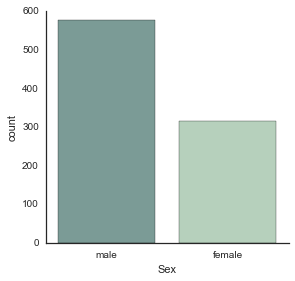

In [18]:
sns.factorplot("Sex", kind ="count", data=titanicDataFrame, palette="BrBG_d")

In [19]:
'''
The above passes “Sex” as a column argument and indicates that the data is coming from the 
Titanic DataFrame that was created earlier. Kind is needed to indicate the kind of plot to draw.
The palette choice from http://matplotlib.org/users/colormaps.html
'''

'\nThe above passes “Sex” as a column argument and indicates that the data is coming from the \nTitanic DataFrame that was created earlier. Kind is needed to indicate the kind of plot to draw.\nThe palette choice from http://matplotlib.org/users/colormaps.html\n'

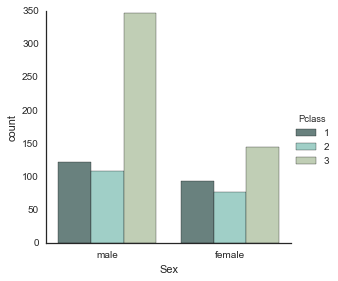

In [20]:
sns.factorplot("Sex", kind = "count", data=titanicDataFrame, hue = "Pclass", palette = "BrBG_d") # ... separates genders by passenger class.

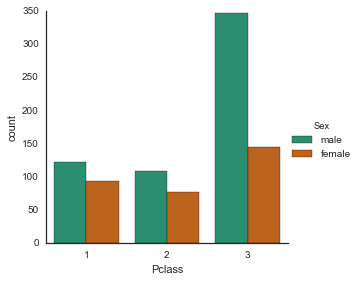

In [21]:
sns.factorplot("Pclass", kind = "count", data=titanicDataFrame, hue = "Sex", palette = "Dark2") # …to look at that comparison differently.

In [22]:
'''
The data shows that, in all passenger classes, there were more males than females. This difference is 
the most pronounced in the third passenger class. 
 
'''

'\nThe data shows that, in all passenger classes, there were more males than females. This difference is \nthe most pronounced in the third passenger class. \n \n'

In [23]:
'''
Since there IS an age column in this dataset, it would be interesting to see how many children make 
up the numbers here as well. 
'''

'\nSince there IS an age column in this dataset, it would be interesting to see how many children make \nup the numbers here as well. \n'

In [24]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 18:
        return "child"
    else:
        return sex

In [25]:
'''
This uses a function with the apply technique to create a new column to help with seeing the distribution.

• The function created is “male_female_child” and it takes in a passenger as an object.

• It takes in the age and gender of the passenger.

• If the passenger’s age is under 18, the passenger gets moved to the child column. 

• If the passenger’s age is above 18, the passenger is described by gender instead.
'''

'\nThis uses a function with the apply technique to create a new column to help with seeing the distribution.\n\n•\xa0The function created is “male_female_child” and it takes in a passenger as an object.\n\n•\xa0It takes in the age and gender of the passenger.\n\n• If the passenger’s age is under 18, the passenger gets moved to the child column. \n\n• If the passenger’s age is above 18, the passenger is described by gender instead.\n'

In [26]:
titanicDataFrame["Person"] = titanicDataFrame[["Age", "Sex"]].apply(male_female_child,axis = 1)

In [27]:
'''
The above adds a new column to the Titanic DataFrame called “Person” which indicates whether a passenger 
is a male, female, or child. In order to do that, the “Age” and “Sex” column values are used with the 
newly-created function (“male_female_child”) applied to it. Since this is a column and not the index, 
the axis needs to be set too - that is the 1 on the end.
'''

'\nThe above adds a new column to the Titanic DataFrame called “Person” which indicates whether a passenger \nis a male, female, or child. In order to do that, the “Age” and “Sex” column values are used with the \nnewly-created function (“male_female_child”) applied to it. Since this is a column and not the index, \nthe axis needs to be set too - that is the 1 on the end.\n'

In [28]:
titanicDataFrame.head() # This checks for the new column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [29]:
titanicDataFrame[0:10] # ... to look for an instance of a "child" row in the new column.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


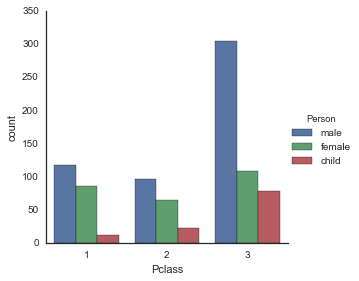

In [30]:
sns.factorplot("Pclass", kind = "count", data = titanicDataFrame, hue = "Person") # .. to see it plotted again

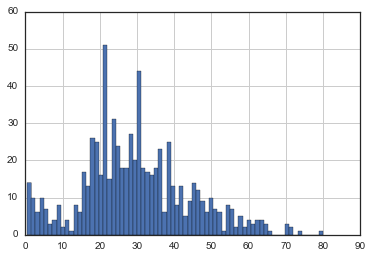

In [31]:
titanicDataFrame["Age"].hist(bins = 70)

In [32]:
'''
The above uses Pandas to create a histogram to see a distribution of the ages to help get a 
clearer picture of the passenger demographics.
'''

'\nThe above uses Pandas to create a histogram to see a distribution of the ages to help get a \nclearer picture of the passenger demographics.\n'

In [33]:
titanicDataFrame["Age"].mean() # To find the mean age of the passengers

29.69911764705882

In [34]:
titanicDataFrame["Person"].value_counts()  # For an overall comparison of men, women, children

male      519
female    259
child     113
Name: Person, dtype: int64

'\nThe above adds a legend to the plot.\n'

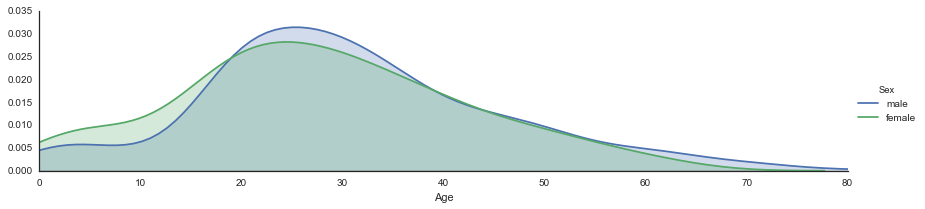

In [35]:
figure = sns.FacetGrid(data = titanicDataFrame, hue = "Sex", aspect = 4)

'''
The above creates a figure by using a FacetGrid with seaborn in addition to the Titanic 
DataFrame that was created earlier. The hue is set to show the gender and the aspect ratio 
is set to 4 for aesthetic reasons.
'''

figure.map(sns.kdeplot,"Age",shade= True)

'''
The above uses map to plot all the possible kde plots for the age columns by hue choice.
'''

oldest = titanicDataFrame["Age"].max()

'''
The above sets the x maximum limit by the oldest passenger by setting an object called 
“oldest” and having that be equal to the maximum age
'''

figure.set(xlim=(0,oldest))

'''
The above sets the lower age limit to zero years old.
'''

figure.add_legend()

'''
The above adds a legend to the plot.
'''

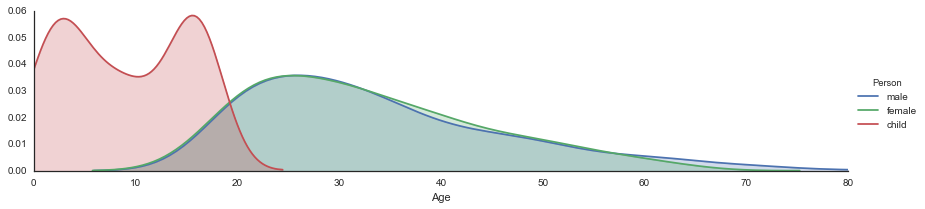

In [36]:
figure = sns.FacetGrid(data = titanicDataFrame, hue = "Person", aspect = 4)

'''
The above adds children to the plot that was generated with the previous version of this code.
'''

figure.map(sns.kdeplot,"Age",shade= True)

oldest = titanicDataFrame["Age"].max()

figure.set(xlim=(0,oldest))

figure.add_legend()

In [37]:
'''
The smoothing parameter/bandwidth is why the children's ages go beyond the cutoff of 18 years old.
ned.ipac.caltech.edu/level5/March02/Silverman/paper.pdf 
'''

"\nThe smoothing parameter/bandwidth is why the children's ages go beyond the cutoff of 18 years old.\nned.ipac.caltech.edu/level5/March02/Silverman/paper.pdf \n"

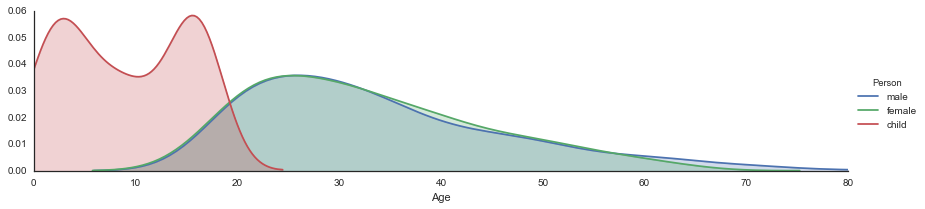

In [38]:
figure = sns.FacetGrid(data = titanicDataFrame, hue = "Person", aspect = 4)

'''
The above checks to see how the ages ranged by passenger class.
'''

figure.map(sns.kdeplot,"Age",shade= True)

oldest = titanicDataFrame["Age"].max()

figure.set(xlim=(0,oldest))

figure.add_legend()

In [39]:
# These plots did a lot to help give a good sense of the demographics of the passengers on board. Onto question #2 now.

In [40]:
'''
The second question is: "How were the passengers distributed? And, did the deck they were on always 
show their Pclass?"
I will the dataset can help to figure out where to start on trying to answer that question.
'''

'\nThe second question is: "How were the passengers distributed? And, did the deck they were on always \nshow their Pclass?"\nI will the dataset can help to figure out where to start on trying to answer that question.\n'

In [41]:
titanicDataFrame[0:1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,male


In [42]:
'''
The cabin column can help with answering this question, but it has some null values. I will need to 
deal with those prior to getting started. 
''' 

'\nThe cabin column can help with answering this question, but it has some null values. I will need to \ndeal with those prior to getting started. \n'

In [43]:
deck = titanicDataFrame["Cabin"].dropna()  # This drops the null values.

In [44]:
deck # This is checking on the success of the previous command.

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
849            C92
853         

In [45]:
'''
The naming convention is cabin level ("C" in the case of the first one) followed by cabin number 
("85" in the same one). www.dummies.com/how-to/content/titanic-facts-the-layout-of-the-ship.html  
As a result, isolating the first letter of each deck helps to classify the level of each deck.
'''

'\nThe naming convention is cabin level ("C" in the case of the first one) followed by cabin number \n("85" in the same one). www.dummies.com/how-to/content/titanic-facts-the-layout-of-the-ship.html  \nAs a result, isolating the first letter of each deck helps to classify the level of each deck.\n'

'\nThe above plots an empty list created (“levels”). A loop is used loop to appends the first \nletter of each deck value to the list and create a DataFrame from the levels list. The columns \nare set to “Cabin”.\n'

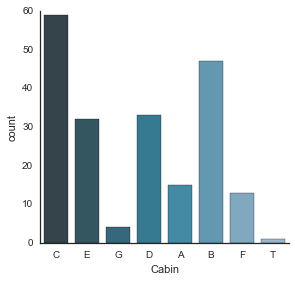

In [46]:
levels = []

for level in deck:
    levels.append(level[0])    

cabinDataFrame = DataFrame(levels)
cabinDataFrame.columns = ["Cabin"]
sns.factorplot("Cabin", kind = "count", data = cabinDataFrame, palette = "PuBuGn_d")

'''
The above plots an empty list created (“levels”). A loop is used loop to appends the first 
letter of each deck value to the list and create a DataFrame from the levels list. The columns 
are set to “Cabin”.
'''

In [47]:
cabinDataFrame = cabinDataFrame[cabinDataFrame.Cabin != 'T'] # … to eliminate the “T” column that shows up randomly.

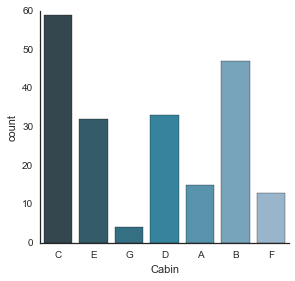

In [48]:
sns.factorplot("Cabin", kind = "count", data = cabinDataFrame, palette = "PuBuGn_d") # Replotting to check the omission. 

In [49]:
# Question #3 was "Where did they embark?"

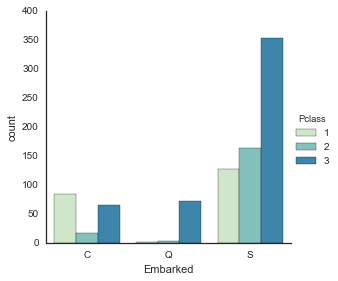

In [50]:
sns.factorplot("Embarked", data = titanicDataFrame, kind = "count", hue = "Pclass", palette = "GnBu", order = ['C','Q','S'])

In [51]:
'''
Above, a factorplot was cplotted to look at where people boarded. The cities 
are: C = Cherbourg; Q = Queenstown; S = Southampton 
www.kaggle.com/c/titanic/data and they are listed in that order.
'''

'\nAbove, a factorplot was cplotted to look at where people boarded. The cities \nare: C = Cherbourg; Q = Queenstown; S = Southampton \nwww.kaggle.com/c/titanic/data and they are listed in that order.\n'

In [52]:
# Question #4 was "Were many passengers traveling alone?"

In [53]:
titanicDataFrame[0:1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,male


In [54]:
# The columns for "SibSp" (Siblings/Spouses) and "Parch" (Parents/Children) can help here. Both being "0" means alone.

In [55]:
titanicDataFrame["Alone"] = titanicDataFrame.Parch + titanicDataFrame.SibSp # "Alone" defined as the sum of the 2 cols.

In [56]:
titanicDataFrame["Alone"]

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [57]:
'''
Again, 0 can be used as a signal that the passenger did not have family aboard. Pulling out 
the 0s from the "Alone" column can isolate the passengers who were not accompanied by family. 
'''

'\nAgain, 0 can be used as a signal that the passenger did not have family aboard. Pulling out \nthe 0s from the "Alone" column can isolate the passengers who were not accompanied by family. \n'

In [58]:
titanicDataFrame["Alone"].loc[titanicDataFrame["Alone"] == 0] = "Alone" # Sets the passengers with 0 to "Alone"

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [59]:
titanicDataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


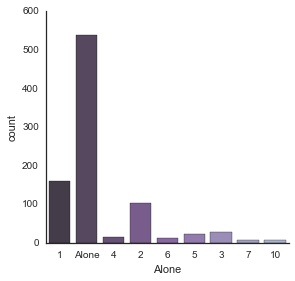

In [60]:
sns.factorplot("Alone", data=titanicDataFrame, kind = "count", palette = "BuPu_d")

In [61]:
# A substantial number of passengers were, indeed, traveling alone.

In [62]:
# Question #5 was "Are there any correlations between survival and other data points?"

In [63]:
titanicDataFrame[0:1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,male,1


In [64]:
# The "Survived" column can help here

In [65]:
titanicDataFrame["Survivor"] = titanicDataFrame.Survived.map({0: "no", 1: "yes"})

In [66]:
'''
The above uses map to create a new column. A dictionary was passed through the map that pulls 
the binary information from the “Survived” column to relay whether a passenger survived (1 = yes) 
or did not survive (0 = no).
'''

'\nThe above uses map to create a new column. A dictionary was passed through the map that pulls \nthe binary information from the “Survived” column to relay whether a passenger survived (1 = yes) \nor did not survive (0 = no).\n'

In [67]:
titanicDataFrame[0:1] # To check for the successful creation of the new column.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,male,1,no


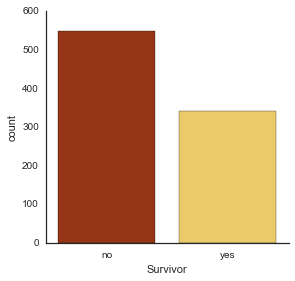

In [68]:
sns.factorplot("Survivor", data = titanicDataFrame, kind = "count", palette = "afmhot") # Plot for an overview.

In [69]:
'''
Which, if any, factors had impacts on passengers surviving or not surviving?

Did passenger class have any impacts on survival rates?
'''

'\nWhich, if any, factors had impacts on passengers surviving or not surviving?\n\nDid passenger class have any impacts on survival rates?\n'

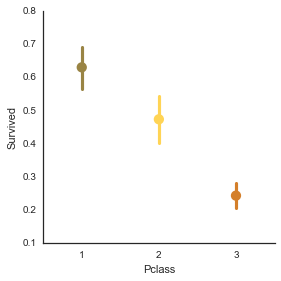

In [70]:
sns.factorplot("Pclass", "Survived", data = titanicDataFrame, palette = "afmhot_d")

In [71]:
# The general survival trend for the third class passengers was drastically lower. Did geneder play a role?

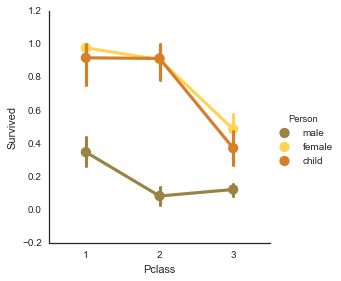

In [72]:
sns.factorplot("Pclass", "Survived", data = titanicDataFrame, hue = "Person", palette = "afmhot_d")

In [73]:
'''
The general survival trend for being male was drastically lower, which makes sense considering 
the “women and children first” rescue policy. The survival trend for the second class male 
passengers was the lowest. To look further into the "women and children first" idea, I will 
next weigh whether or not age did, indeed, play a role in a passenger's chance for survival.
'''

'\nThe general survival trend for being male was drastically lower, which makes sense considering \nthe “women and children first” rescue policy. The survival trend for the second class male \npassengers was the lowest. To look further into the "women and children first" idea, I will \nnext weigh whether or not age did, indeed, play a role in a passenger\'s chance for survival.\n'

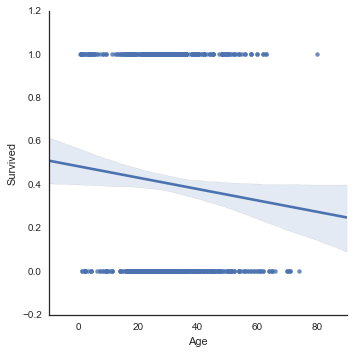

In [74]:
sns.lmplot("Age", "Survived", data = titanicDataFrame) # Plotting "Age" compared to "Survived"

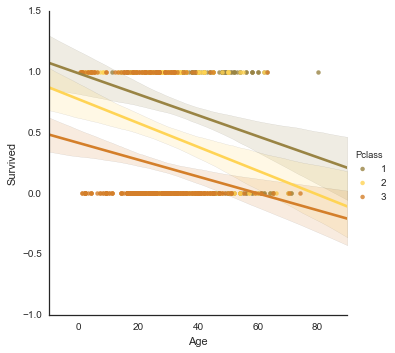

In [75]:
sns.lmplot("Age", "Survived", hue = "Pclass", data = titanicDataFrame, palette = "afmhot_d") # Adding "Pclass" too

In [76]:
spreadAge = [10,20,35,55,80] # Spreading out the data to get a more clear view of the age segmentation based on age.

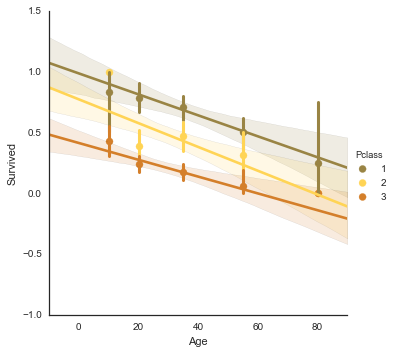

In [77]:
sns.lmplot("Age", "Survived", hue = "Pclass", data = titanicDataFrame, palette = "afmhot_d", x_bins = spreadAge)

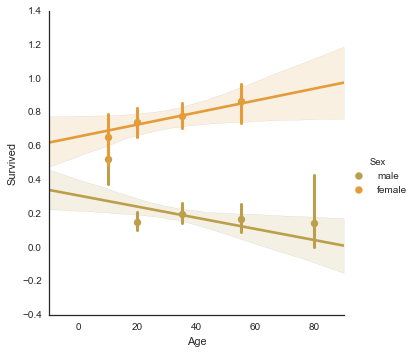

In [78]:
sns.lmplot("Age", "Survived", hue = "Sex", data = titanicDataFrame, palette = "afmhot_d", x_bins = spreadAge)

In [79]:
'''
There’s a high standard deviation in the survival trend of the older male passengers. Still though, 
it seems that older females on the Titanic had a better chance of survival than older males did.
'''

'\nThere’s a high standard deviation in the survival trend of the older male passengers. Still though, \nit seems that older females on the Titanic had a better chance of survival than older males did.\n'